# Store & Product Performance Segmentation

## Setup

In [ ]:
from dotenv import load_dotenv
import os

load_dotenv('/content/drive/My Drive/path_to_your_env_file/.env')

try:
  product_hierarchy_df = pd.read_csv(product_hierarchy_path)
  store_cities_df = pd.read_csv(store_cities_path)
  sales_df = pd.read_csv(sales_path)

  print("Successfully loaded product_hierarchy.csv:")
  print(product_hierarchy_df.head())

  print("\nSuccessfully loaded store_cities.csv:")
  print(store_cities_df.head())

  print("\nSuccessfully loaded sales.csv:")
  print(sales_df.head())

except FileNotFoundError:
  print(f"Error: One or both of the files not found. Check the paths: \n {product_hierarchy_path} \n {store_cities_path}")
except Exception as e:
    print(f"An error occurred: {e}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Successfully loaded product_hierarchy.csv:
  product_id  product_length  product_depth  product_width cluster_id  \
0      P0001            13.5           22.0           20.0  cluster_5   
1      P0002            22.0           40.0           22.0  cluster_0   
2      P0004             2.0           13.0            4.0  cluster_3   
3      P0005            16.0           30.0           16.0  cluster_9   
4      P0006             8.5           15.0           15.0  cluster_0   

  hierarchy1_id hierarchy2_id hierarchy3_id hierarchy4_id hierarchy5_id  
0           H01         H0105       H010501     H01050100   H0105010006  
1           H03         H0315       H031508     H03150800   H0315080028  
2           H03         H0314       H031405     H03140500   H0314050003  
3           H03         H0312       H031211     H03121109   H0312110917  
4           H03    

In [ ]:
merged_df = pd.merge(sales_df, product_hierarchy_df, on='product_id', how='left')
merged_df = pd.merge(merged_df, store_cities_df, on='store_id', how='left')
print(merged_df.head())

  product_id store_id      date  sales  revenue  stock  price promo_type_1  \
0      P0001    S0002  02/01/17    0.0     0.00    8.0   6.25         PR14   
1      P0001    S0012  02/01/17    1.0     5.30    0.0   6.25         PR14   
2      P0001    S0013  02/01/17    2.0    10.59    0.0   6.25         PR14   
3      P0001    S0023  02/01/17    0.0     0.00    6.0   6.25         PR14   
4      P0001    S0025  02/01/17    0.0     0.00    1.0   6.25         PR14   

  promo_bin_1 promo_type_2  ...  product_width  cluster_id  hierarchy1_id  \
0         NaN         PR03  ...           20.0   cluster_5            H01   
1         NaN         PR03  ...           20.0   cluster_5            H01   
2         NaN         PR03  ...           20.0   cluster_5            H01   
3         NaN         PR03  ...           20.0   cluster_5            H01   
4         NaN         PR03  ...           20.0   cluster_5            H01   

   hierarchy2_id  hierarchy3_id  hierarchy4_id hierarchy5_id storety

## Cluster Stores by Performance

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

store_sales = merged_df.groupby('store_id')['sales'].sum().reset_index()

X = store_sales[['sales']]
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
store_sales['cluster'] = kmeans.labels_

performance_mapping = {
    0: 'Low',
    1: 'Medium',
    2: 'High'
}
store_sales['performance_category'] = store_sales['cluster'].map(performance_mapping)

print(store_sales.head())

cluster_stats = store_sales.groupby('performance_category')['sales'].agg(['mean', 'count'])
print("\nCluster Statistics:")
cluster_stats


  store_id   sales  cluster performance_category
0    S0001  329.52        0                  Low
1    S0002  334.38        0                  Low
2    S0003  145.36        2                 High
3    S0004  111.00        2                 High
4    S0006   43.00        2                 High

Cluster Statistics:


,mean,count
performance_category,,
High,98.243594,64
Low,290.164054,37
Medium,979.390000,6


### Visual of Low Performing Stores

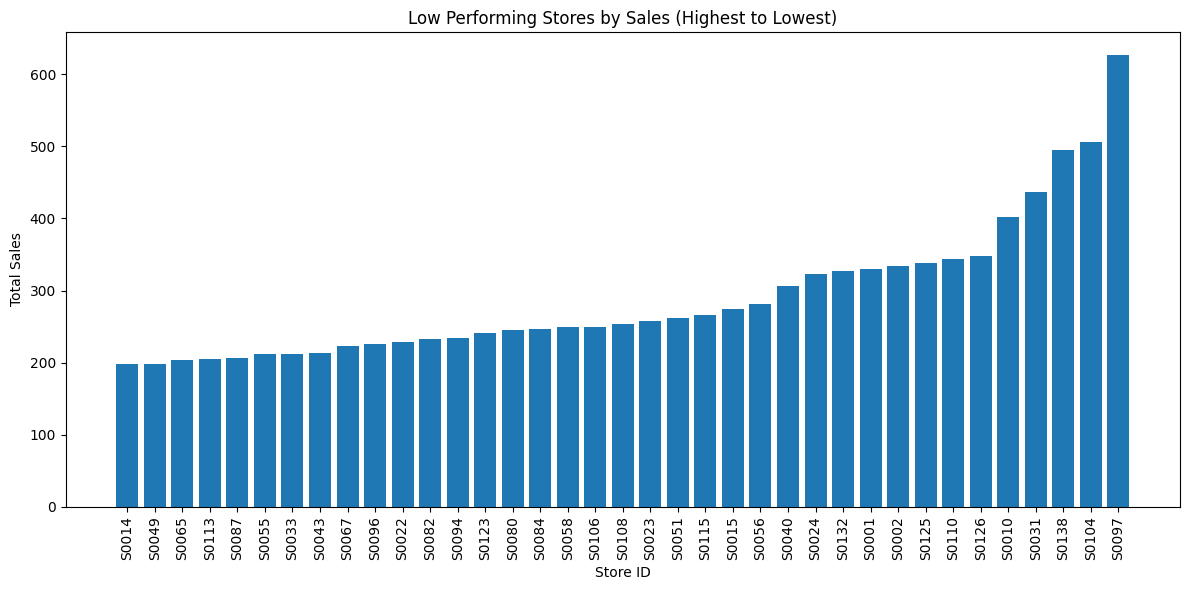

In [ ]:
import matplotlib.pyplot as plt

low_performers = store_sales[store_sales['performance_category'] == 'Low'].sort_values(by='sales')

plt.figure(figsize=(12, 6))
plt.bar(low_performers['store_id'], low_performers['sales'])
plt.xlabel("Store ID")
plt.ylabel("Total Sales")
plt.title("Low Performing Stores by Sales (Highest to Lowest)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()